In [89]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine

In [90]:
data = load_wine()
df = pd.DataFrame(data=data.data, columns=wine.feature_names)
df['target'] = wine.target

In [91]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [92]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [93]:
df.shape

(178, 14)

In [94]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


c:\Users\stemo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


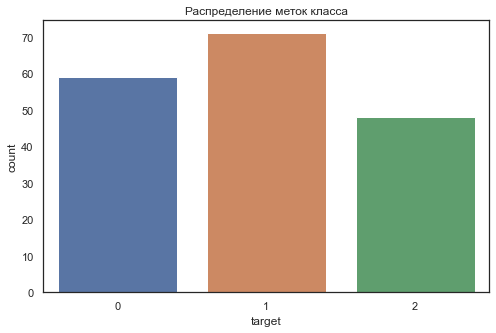

In [95]:
# Посмотрим на распределение меток класса:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(df['target'])
plt.title('Распределение меток класса')
plt.show()

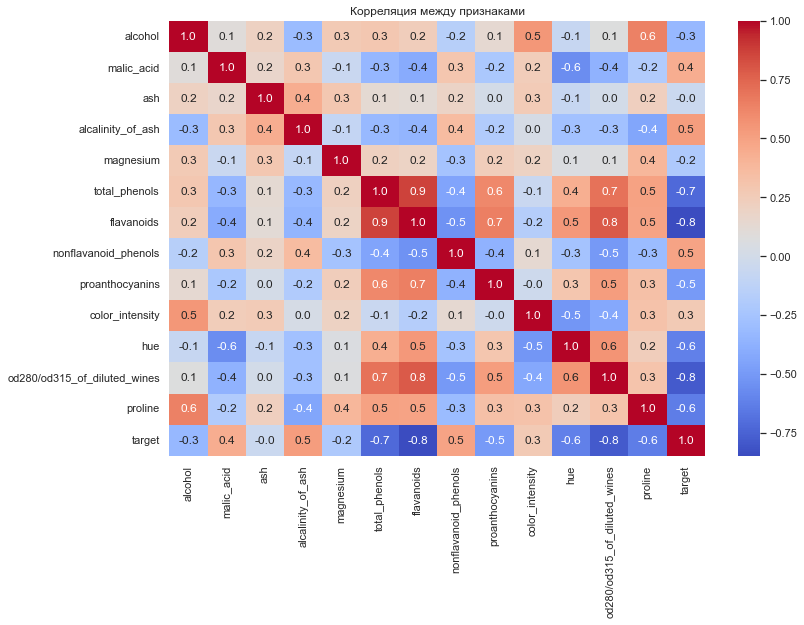

In [96]:
# Для изучения корреляции между признаками, построим heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Корреляция между признаками')
plt.show()

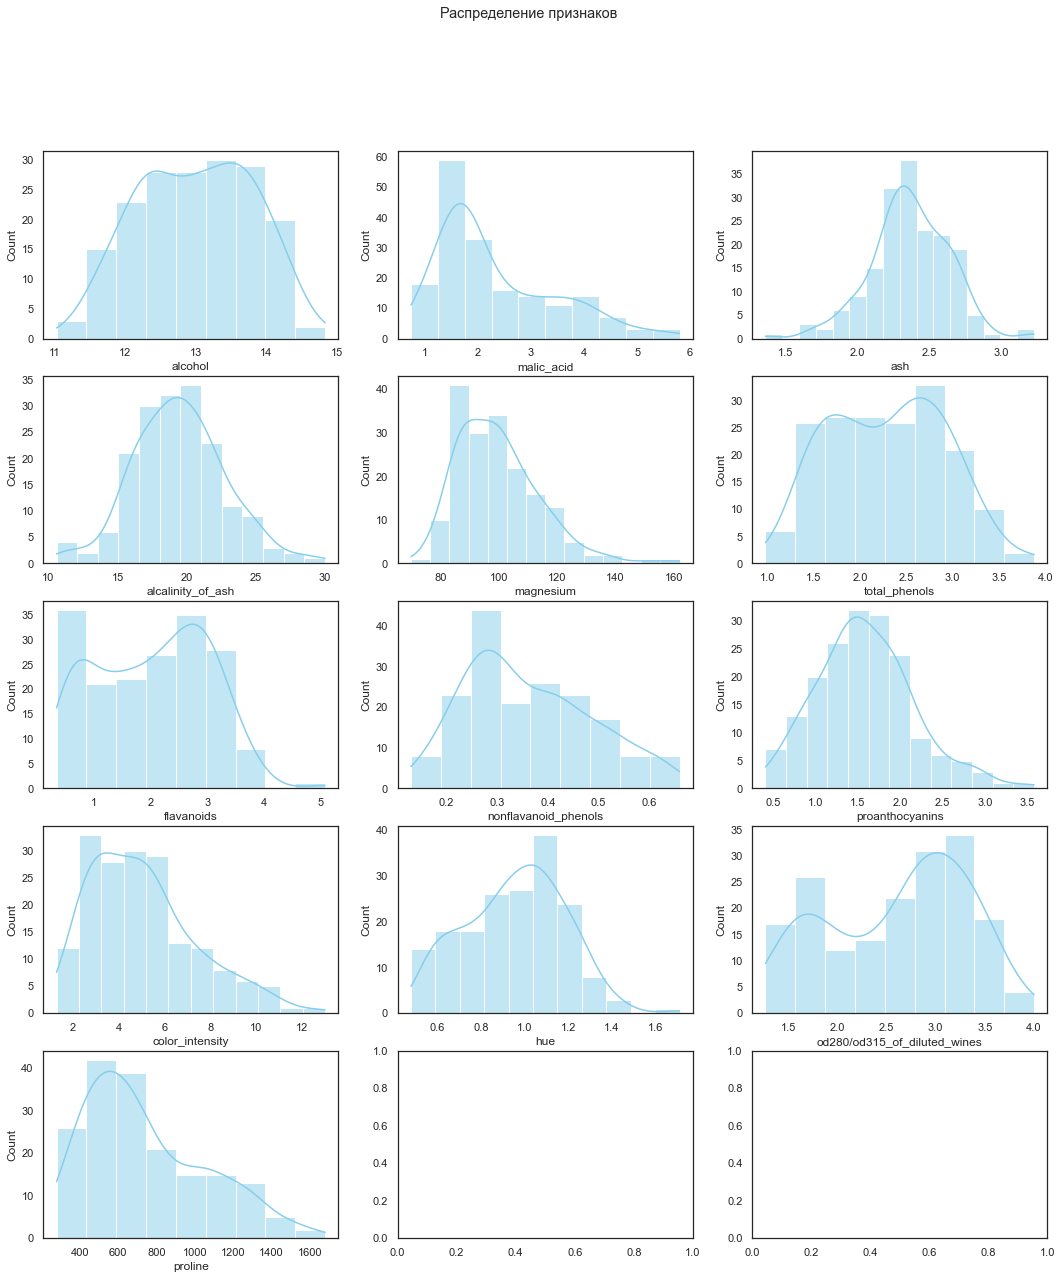

In [97]:
# Построим гистограммы распределения признаков:

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(18, 20))

for i, feature_name in enumerate(data.feature_names):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=feature_name, kde=True, color='skyblue', ax=axs[row, col])

plt.suptitle('Распределение признаков')
plt.show()

Из гистограмм видно, что некоторые признаки имеют нормальное распределение, например, "alcohol", а некоторые имеют смещенное распределение, например, "ash". 

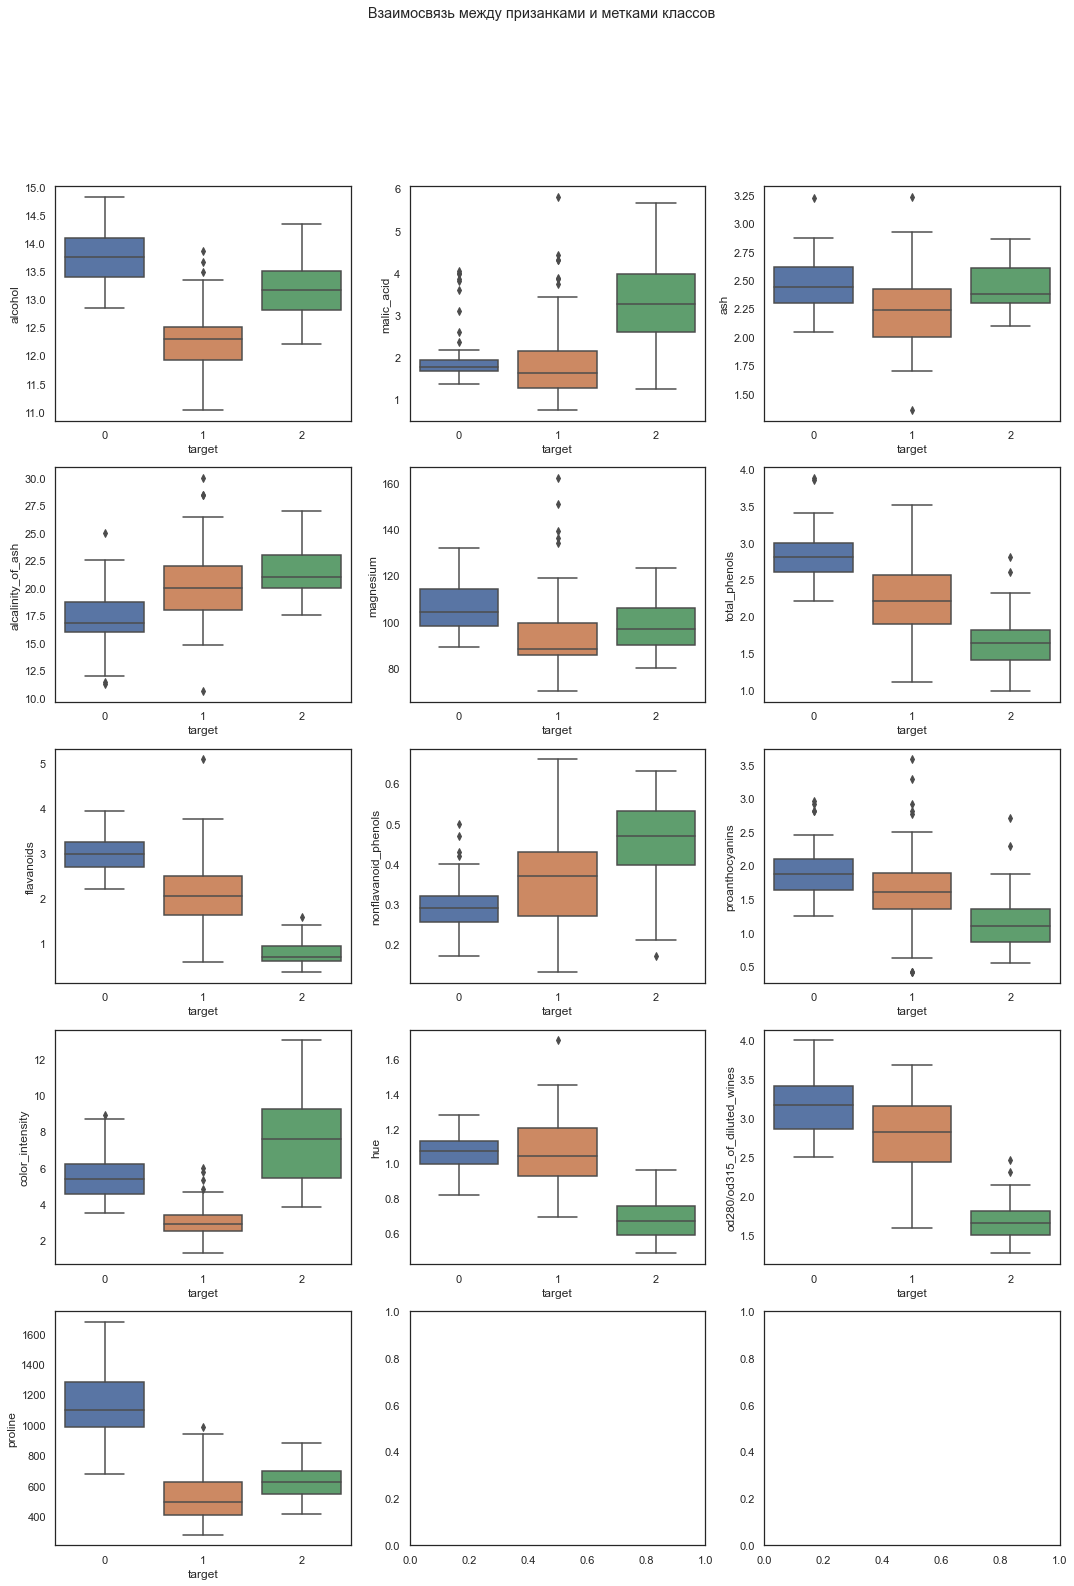

In [98]:
# Для изучения взаимосвязи между признаками и метками классов, построим boxplot:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(18, 25))

for i, feature_name in enumerate(data.feature_names):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, x='target', y=feature_name, ax=axs[row, col])

plt.suptitle('Взаимосвязь между призанками и метками классов')
plt.show()

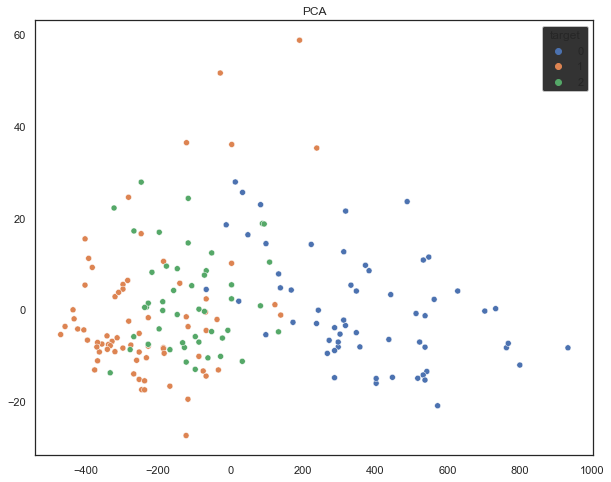

In [99]:
# Для снижения размерности и визуализации данных, применим метод главных компонент. Для визуализации, построим scatterplot:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.iloc[:, :-1])

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], palette='deep')
plt.title('PCA')
plt.show()

Из графика видно, что классы хорошо разделены в новом пространстве признаков.

Text(0.5, 0, 'Имена признаков')

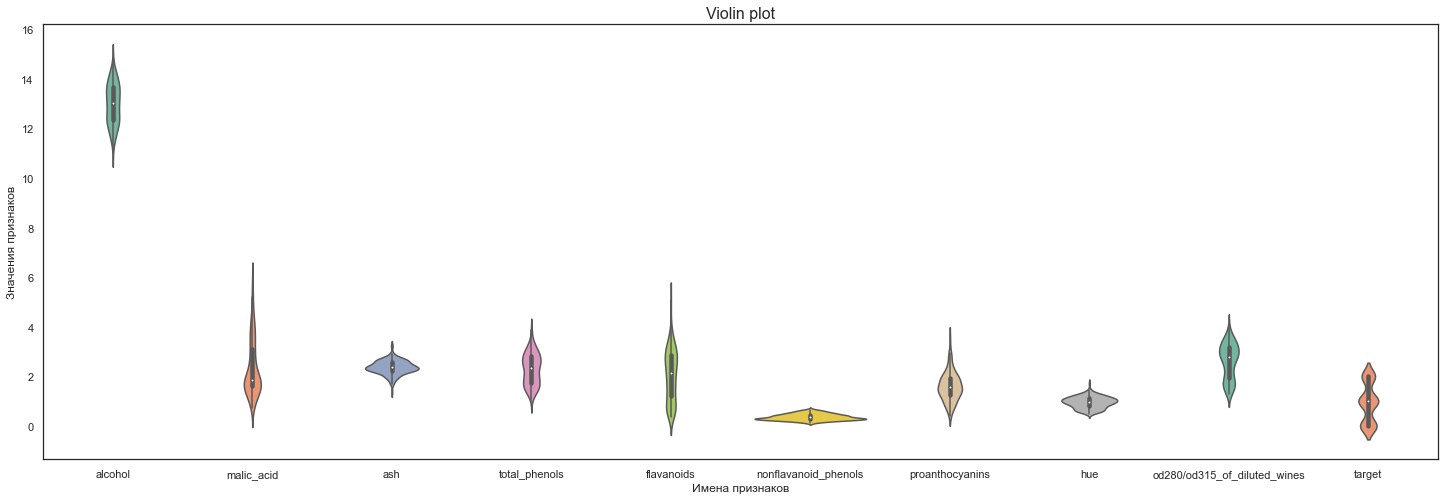

In [100]:
zuh = df.drop(columns=['proline', "magnesium", "alcalinity_of_ash", "color_intensity"])

plt.figure(figsize=(25,8))
plt.title("Violin plot", fontsize=16)
sns.violinplot(data=zuh, palette="Set2")
plt.ylabel("Значения признаков")
plt.xlabel("Имена признаков")

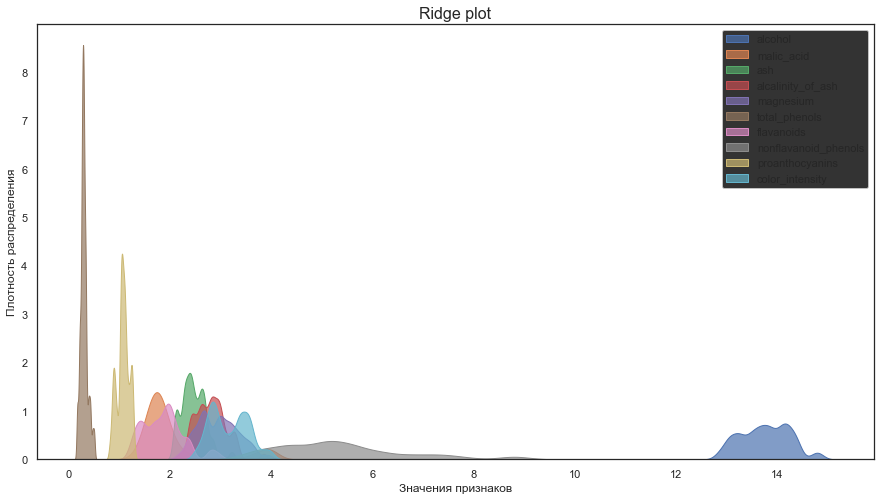

In [101]:
# Построение Ridge plot
plt.figure(figsize=(15,8))
plt.title("Ridge plot", fontsize=16)
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
zuh = df.drop(columns=['proline', "magnesium", "alcalinity_of_ash"])
for i in range(10):
    ax = sns.kdeplot(data=zuh.iloc[:,i][:50], 
                     bw_adjust=.5, 
                     label=data.feature_names[i], 
                     shade=True, 
                     alpha=.7)
plt.xlabel("Значения признаков")
plt.ylabel("Плотность распределения")
plt.legend()
plt.show()

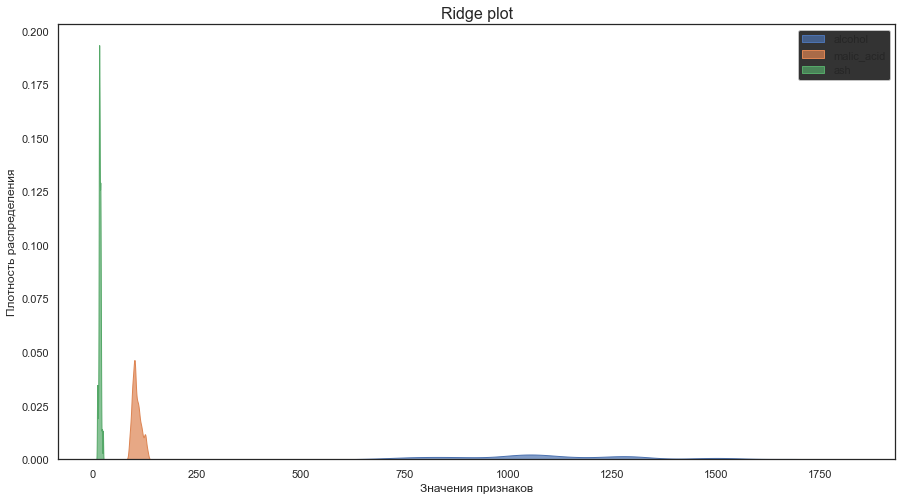

In [102]:
plt.figure(figsize=(15,8))
plt.title("Ridge plot", fontsize=16)
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
zuh = df[['proline', "magnesium", "alcalinity_of_ash"]]
for i in range(3):
    ax = sns.kdeplot(data=zuh.iloc[:,i][:50], 
                     bw_adjust=.5, 
                     label=wine.feature_names[i], 
                     shade=True, 
                     alpha=.7)
plt.xlabel("Значения признаков")
plt.ylabel("Плотность распределения")
plt.legend()
plt.show()

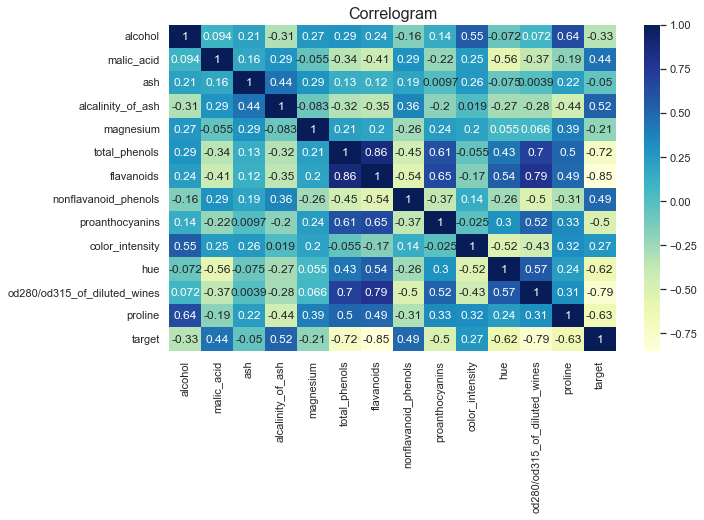

In [103]:
# Построение Correlogram
plt.figure(figsize=(10,6))
plt.title("Correlogram", fontsize=16)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

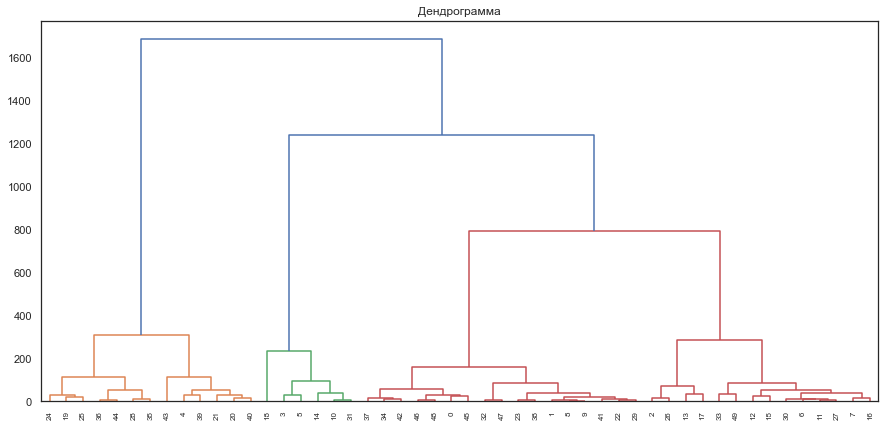

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 7))
plt.title("Дендрограмма")
dend = dendrogram(linkage(df[:50], method='ward'))
plt.show()